In [40]:
import pandas as pd
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
pd.options.mode.chained_assignment = None  

In [41]:
df_list = glob.glob('../data/behavioral/sub-10*')

In [73]:
#functions that can be used to make columns


#previous trial was a win and marginally larger than the prior that was also a win. apply within choices maintains "stays"

def win_stay(row):
    if (
        (row['prev_deckchoice'] == row['deckchoice']) and 
        (row['point_total'] > (row['prev_points'] + 3))
        ):
        return 1
    else:
        return 0
    
def lose_switch(row):
    if (
        (row['prev_deckchoice'] != row['deckchoice']) and 
         (row['point_total'] < (row['prev_points'] -3))
        ):
        return 1
    else:
        return 0

#previous partner social or nonsocial (computer)

def win_stay_partner_prev_soc(row):
    if (row['win_stay'] == 1 and 
       row['prev_partner'] == 1
       ):
        return 1
    else:
        return 0
    
def win_stay_partner_prev_comp(row):
    if (row['win_stay'] == 1 and
        row['prev_partner'] == 0
        ):
        return 1
    else:
        return 0
    
def lose_switch_partner_prev_soc(row):
    if (row['lose_switch'] == 1 and 
       row['prev_partner'] == 1
        ):
        return 1
    else:
        return 0
    
def lose_switch_partner_prev_comp(row):
    if (row['lose_switch'] == 1 and 
       row['prev_partner'] == 0
       ):
        return 1
    else:
        return 0
    
#current trial social or nonsocial

#win stay
def win_stay_partner_current_soc(row):
    if row['win_stay'] == 1 and row['partner'] == 1:
        return 1
    else:
        return 0

def win_stay_partner_current_comp(row):
    if row['win_stay'] == 1 and row['partner'] == 0:
        return 1
    else:
        return 0

#lose switch
def lose_switch_partner_current_soc(row):
    if row['lose_switch'] == 1 and row['partner'] == 1:
        return 1
    else:
        return 0

def lose_switch_partner_current_comp(row):
    if row['lose_switch'] == 1 and row['partner'] == 0:
        return 1
    else:
        return 0
    
def affective_prior_win(row):
    pass

def affective_prior_loss(row):
    pass

In [74]:
class SubjectBehavior:
    def __init__(self):
        self.name = name
    

In [75]:
#6 columns, sub per row 3 for win stay 3 for lose shift

In [76]:
wins = []
loss = []

win_stay_prev_comp_l = []
win_stay_prev_soc_l = []

win_stay_current_comp_l = []
win_stay_current_soc_l = []


for i in df_list:
    df = pd.read_csv(i)

    #sets up columns with shift function to allow above functions to run per row
    #df.loc[df['prev_win']] = df['soc_win'].shift()
    #df['earlier_win'] = df['prev_win'].shift()
    
    #shift for deck choice
    df['prev_deckchoice'] = df['deckchoice'].shift()

    #shifts for points
    df['prev_points'] = df['point_total'].shift()
    
    #partner
    df['prev_partner'] = df['partner'].shift()

    #apply functions 
    
    df['win_stay'] = df.apply(win_stay, axis=1)  
    df['lose_switch'] = df.apply(lose_switch, axis=1)

    df['win_stay_partner_prev_comp'] = df.apply(win_stay_partner_prev_comp, axis=1)
    df['win_stay_partner_prev_soc'] = df.apply(win_stay_partner_prev_soc, axis=1)
    
    df['win_stay_partner_current_comp'] = df.apply(win_stay_partner_current_comp, axis=1)
    df['win_stay_partner_current_soc'] = df.apply(win_stay_partner_current_soc, axis=1)
    
    all_wins = (df['point_total'] > df['prev_points'] + 3).count()
    all_loss = (df['point_total'] < df['prev_points'] - 3).count()
    
    win_stays = (df['win_stay'].sum())
    lose_switches = (df['lose_switch'].sum())
     
    win_stay_prev_comp = (df['win_stay_partner_prev_comp'].sum())
    win_stay_prev_soc = (df['win_stay_partner_prev_soc'].sum())
    
    win_stay_current_comp = (df['win_stay_partner_current_comp'].sum())
    win_stay_current_soc = (df['win_stay_partner_current_soc'].sum())
    
    #calculate averages
    win_stay_perc = win_stays / all_wins
    lose_switch_perc = lose_switches / all_loss

    win_stay_prev_comp_perc = win_stay_prev_comp / all_wins
    win_stay_prev_soc_perc = win_stay_prev_soc / all_loss
    
    win_stay_current_comp_perc = win_stay_current_comp / all_wins
    win_stay_current_soc_perc = win_stay_current_soc / all_loss
    
    
    #add to list
    wins.append(win_stay_perc)
    loss.append(lose_switch_perc)

    win_stay_prev_comp_l.append(win_stay_prev_comp_perc)
    win_stay_prev_soc_l.append(win_stay_prev_soc_perc)
       
    win_stay_current_comp_l.append(win_stay_current_comp_perc)
    win_stay_current_soc_l.append(win_stay_current_soc_perc)

In [77]:
win_stay_mean = np.mean(wins)
loss_switch_mean = np.mean(loss)

win_stay_error = np.std(wins)
loss_switch_error = np.std(loss)

<BarContainer object of 2 artists>

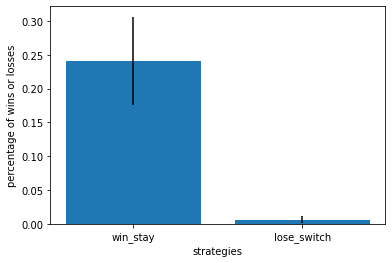

In [78]:
fig = plt.figure()
strategies = ['win_stay', 'lose_switch']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.bar(x = strategies, height = [win_stay_mean,loss_switch_mean], yerr = [win_stay_error, loss_switch_error])

In [70]:
win_stay_prev_comp_l_mean = np.mean(win_stay_prev_comp_l)
win_stay_prev_soc_l_mean = np.mean(win_stay_prev_soc_l)
print(win_stay_prev_comp_l_mean)
win_stay_prev_comp_l_error = np.std(win_stay_prev_comp_l)
win_stay_prev_soc_l_error = np.std(win_stay_prev_soc_l)

0.1138888888888889


<BarContainer object of 2 artists>

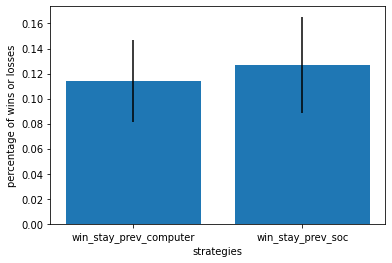

In [71]:
fig = plt.figure()
strategies = ['win_stay_prev_computer', 'win_stay_prev_soc']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.bar(x = strategies, height = [win_stay_prev_comp_l_mean,win_stay_prev_soc_l_mean], yerr = [win_stay_prev_comp_l_error, win_stay_prev_soc_l_error])

<BarContainer object of 2 artists>

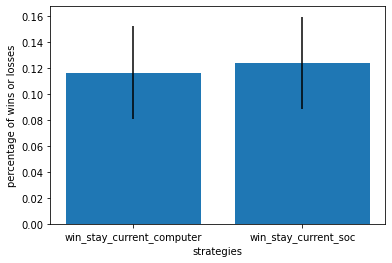

In [72]:
win_stay_current_comp_l_mean = np.mean(win_stay_current_comp_l)
win_stay_current_soc_l_mean = np.mean(win_stay_current_soc_l)

win_stay_current_comp_l_error = np.std(win_stay_current_comp_l)
win_stay_current_soc_l_error = np.std(win_stay_current_soc_l)
fig = plt.figure()
strategies = ['win_stay_current_computer', 'win_stay_current_soc']
plt.xlabel('strategies')
plt.ylabel('percentage of wins or losses')
plt.bar(x = strategies, height = [win_stay_current_comp_l_mean,win_stay_current_soc_l_mean], yerr = [win_stay_current_comp_l_error, win_stay_current_soc_l_error])